In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import gradio as gr 

In [23]:
# Charger le jeu de données Titanic 
titanic_data = pd.read_csv('titanic.csv') 
# Afficher un aperçu des données 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
women = titanic_data.loc[titanic_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [25]:
men = titanic_data.loc[titanic_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


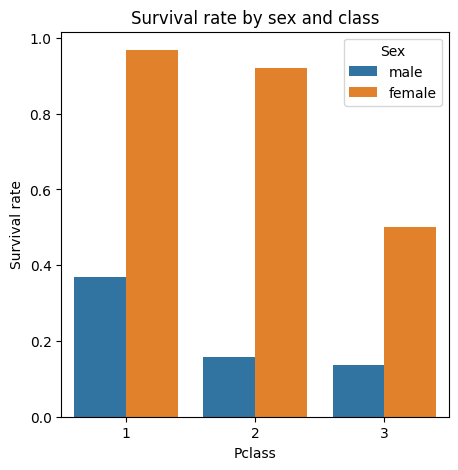

In [26]:
def bar_chart_compare(dataset, feature1, feature2=None, title='Survival rate by sex and class'):
    plt.figure(figsize=[5,5])
    plt.title(title)
    g = sns.barplot(x=feature1, y='Survived', hue=feature2, errorbar=None, data=dataset).set_ylabel('Survival rate')
bar_chart_compare(titanic_data, 'Pclass', 'Sex')

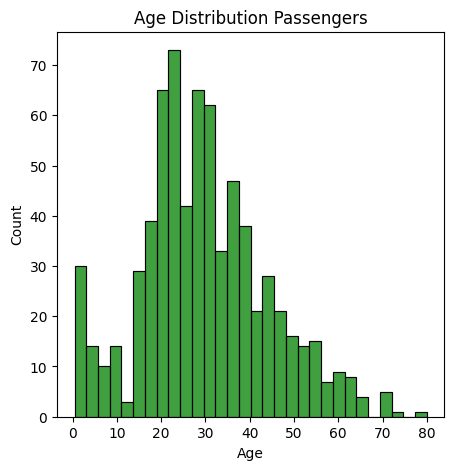

In [27]:
def plot_distribution(dataset, feature, title, bins=30, hist=True, fsize=(5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.histplot(titanic_data[feature], color='g', bins=bins, ax=ax) 
    
plot_distribution(titanic_data, 'Age', 'Age Distribution Passengers')

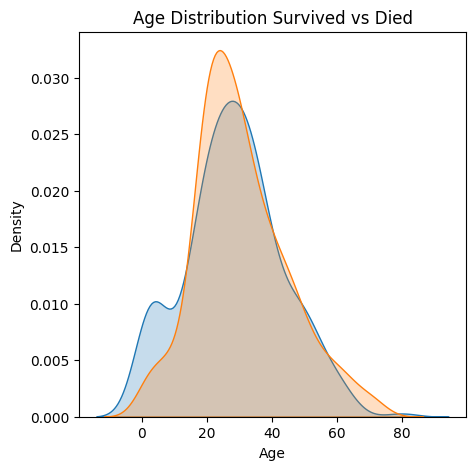

In [28]:
def plot_kernel_density_estimate_survivors(dataset, feature, title, fsize=(5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    sns.kdeplot(dataset[feature].loc[titanic_data['Survived'] == 1],
                fill=True, ax=ax, label='Survived').set_xlabel(feature)
    sns.kdeplot(dataset[feature].loc[titanic_data['Survived'] == 0],
               fill=True, ax=ax, label='Died')

plot_kernel_density_estimate_survivors(titanic_data, 'Age', 'Age Distribution Survived vs Died')


In [33]:
 
def visualisation_interactive_donnees(fichier_donnees): 
    # Charger l'ensemble de données en utilisant pandas 
    df = pd.read_csv(fichier_donnees) 
 
    def tracer_graphique(colonne): 
        # Créer la visualisation en fonction de la colonne sélectionnée 
        plt.figure(figsize=(10, 6)) 
        plt.bar(df.index, df[colonne]) 
        plt.xlabel("Index") 
        plt.ylabel(colonne) 
        plt.title(f"Visualisation de {colonne}") 
 
        # Afficher le graphique 
        plt.show() 
 
    def appliquer_filtres(colonne_filtre, valeur_filtre): 
        # Appliquer des filtres en fonction de la colonne et de la valeur sélectionnées 
        df_filtre = df[df[colonne_filtre] == valeur_filtre] 
 
        # Afficher les données filtrées 
        print(df_filtre) 
 
    # Obtenir les noms de colonnes pour la sélection de l'utilisateur 
    colonnes = list(df.columns) 
 
    # Créer l'interface avec Gradio 
    iface = gr.Interface( 
        fn=tracer_graphique, 
        # inputs=gr.inputs.Textbox(label="Output Prediction"),
        inputs=gr.inputs.Dropdown(choices=["Sex","Pclass","Name","Age"], default=["Sex"],label ='GarageType') , 

        outputs=None, 
        title="Visualisation Interactive des Données", 
        description="Sélectionnez une colonne à visualiser", 
        choices=colonnes 
    ) 
 
    # Créer l'interface pour appliquer des filtres 
    interface_filtres = gr.Interface( 
        fn=appliquer_filtres, 
        inputs=[gr.inputs.Dropdown(choices=["Sex","Pclass","Name","Age"], default=["Sex"],label ='GarageType') , gr.inputs.Textbox(label ='sex') ], 
        outputs=None, 
        title="Appliquer des Filtres", 
        description="Sélectionnez une colonne et saisissez une valeur de filtre", 
        choices=colonnes 
    ) 
    # appliquer_filtres("Sex","male")
    # tracer_graphique("Sex")
        # Lancer les interfaces 
    iface.launch() 
    interface_filtres.launch() 


c:\Users\Republic Of Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\Republic Of Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\Republic Of Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'choices': ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']}
  warnings.warn(
c:\Users\Republic Of Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the 

Running on local URL:  http://127.0.0.1:7880

To create a public link, set `share=True` in `launch()`.


Running on local URL:  http://127.0.0.1:7881

To create a public link, set `share=True` in `launch()`.


Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


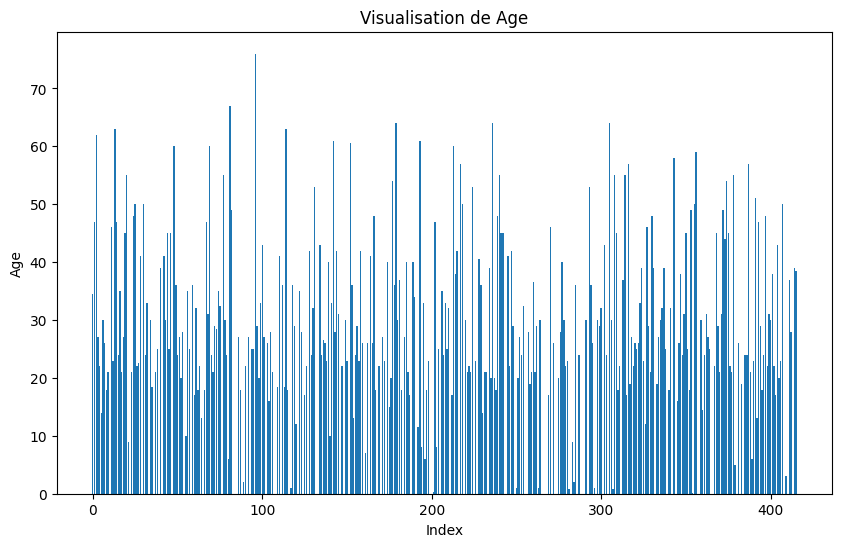

In [34]:
# Spécifier le chemin vers le fichier de données 
fichier_donnees = "donnees.csv" 
# Appeler la fonction pour démarrer la visualisation interactive des données 
visualisation_interactive_donnees(fichier_donnees) 
